# Laboratorio 10: RED DE DISTRIBUCIÓN. REPRESENTACIÓN GRÁFICA. EJEMPLOS DE REDES. ALGORITMOS

## Integrante:

- Escriba Flores, Daniel Agustin

--- 

In [3]:
## Importamos las librerias necesarias 



import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from criticalpath import Node

# ================================
import warnings
warnings.filterwarnings('ignore')

# Parte A:

Utilizando la librería ‘networkx’, grafique el modelo de red y encuentre el flujo máximo entre los nodos 1 y 5, así como los flujos que llegan a cada nodo.

In [2]:
# creamos los nodos
G = nx.DiGraph()
L = ["1","2","3","4","5","6"]
for vertice in L:
 G.add_node(vertice)

#Agregamos los arcos

G.add_edge("1","2")
G.add_edge("1","3")
G.add_edge("1","4")
G.add_edge("1","5")
G.add_edge("2","3")
G.add_edge("2","4")
G.add_edge("2","5")
G.add_edge("3","4")
G.add_edge("3","6")
G.add_edge("4","5")
G.add_edge("4","6")
G.add_edge("5","6")

# Agregamos los pesos a cada arco

G.add_weighted_edges_from([("1","2",1)])
G.add_weighted_edges_from([("1","3",5)])
G.add_weighted_edges_from([("1","4",7)])
G.add_weighted_edges_from([("1","5",9)])
G.add_weighted_edges_from([("2","3",6)])
G.add_weighted_edges_from([("2","4",4)])
G.add_weighted_edges_from([("2","5",3)])
G.add_weighted_edges_from([("3","4",5)])
G.add_weighted_edges_from([("3","6",10)])
G.add_weighted_edges_from([("4","5",8)])
G.add_weighted_edges_from([("4","6",3)])
G.add_weighted_edges_from([("5","6",6)])


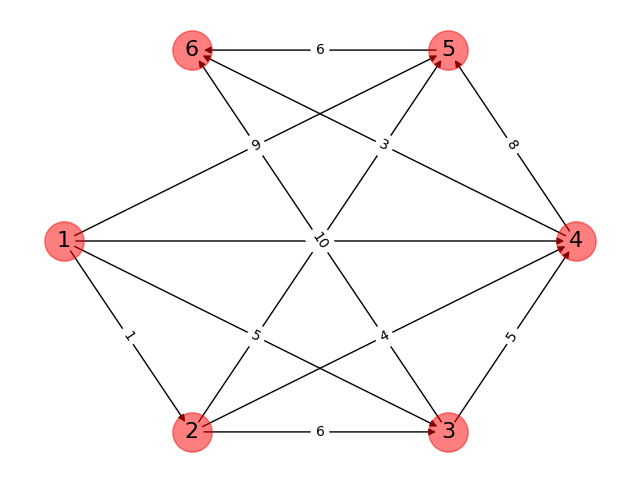

In [3]:
# Crear la figura
fig = plt.figure(figsize=(8, 6))
posiciones = nx.shell_layout(G)
# Dibujar nodos
nx.draw_networkx_nodes(G, posiciones, node_color='r', node_size=800, alpha=0.5)
# Dibujar aristas
nx.draw_networkx_edges(G, posiciones)
# Crear etiquetas para los nodos
etiquetas = {vertice: str(vertice) for vertice in G.nodes()}
nx.draw_networkx_labels(G, posiciones, etiquetas, font_size=16)
# Crear etiquetas para las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, posiciones, edge_labels)
# Ocultar los ejes
plt.axis('off')
# Mostrar la grafica
plt.show()

In [4]:
# Pedir al usuario los nodos de inicio y fin

start, end = input("Ingrese los nodos de inicio y fin separados por espacios: ").split()
# Encontrar y mostrar la ruta más corta
path = nx.dijkstra_path(G, source=start, target=end)
print(f'La ruta más corta del nodo {start} al {end} es:', path)
# Encontrar y mostrar la distancia de la ruta más corta
distance = nx.dijkstra_path_length(G, source=start, target=end)
print(f'La distancia de la ruta más corta del nodo {start} al {end} es:', distance)


La ruta más corta del nodo 1 al 6 es: ['1', '2', '4', '6']
La distancia de la ruta más corta del nodo 1 al 6 es: 8


# Parte B:

Utilizando la librería ‘networkx’, grafique el modelo de red y encuentre el flujo máximo entre los nodos 1 y 5, así como los flujos que llegan a cada nodo.

In [5]:
# agreamos nodos y arcos

G = nx.DiGraph()
L = ["1","2","3","4","5"]
for vertice in L:
 G.add_node(vertice)


G.add_edge("1","2",capacity=8)
G.add_edge("1","3",capacity=14)
G.add_edge("1","5",capacity=4)
G.add_edge("2","1",capacity=0)
G.add_edge("2","3",capacity=5)
G.add_edge("2","4",capacity=7)
G.add_edge("2","5",capacity=6)
G.add_edge("3","1",capacity=0)
G.add_edge("3","2",capacity=10)
G.add_edge("3","4",capacity=9)
G.add_edge("3","5",capacity=10)
G.add_edge("4","2",capacity=6)
G.add_edge("4","3",capacity=7)
G.add_edge("4","5",capacity=5)
G.add_edge("5","1",capacity=0)
G.add_edge("5","2",capacity=0)
G.add_edge("5","3",capacity=0)
G.add_edge("5","4",capacity=0)


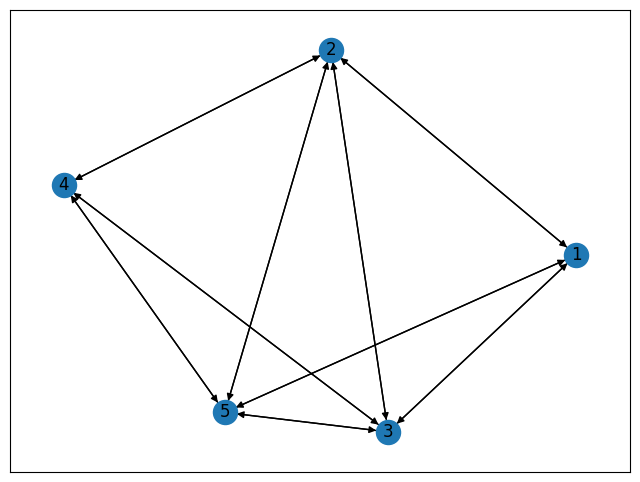

In [6]:
# Graficamos

fig = plt.figure(figsize=(8,6))
nx.draw_networkx(G,with_labels=True)

In [7]:
maximo, flujos = nx.maximum_flow(G,"1","5")
print("El flujo máximo entre el nodo 1 y 5 es:",maximo)
print("Los flujos que llegan a cada nodo son:\n",flujos)


El flujo máximo entre el nodo 1 y 5 es: 25
Los flujos que llegan a cada nodo son:
 {'1': {'2': 7, '3': 14, '5': 4}, '2': {'1': 0, '3': 0, '4': 5, '5': 6}, '3': {'1': 0, '2': 4, '4': 0, '5': 10}, '4': {'2': 0, '3': 0, '5': 5}, '5': {'1': 0, '2': 0, '3': 0, '4': 0}}


# Parte C:

Utilizando las librerías ‘networkx’ y ‘criticalpath’, grafique el modelo de red y encuentre la ruta crítica entre los nodos 1 y 7, así como la distancia de esta.

In [8]:
G = nx.DiGraph()
L = ["1","2","3","4","5","6","7"]
for vertice in L:
 G.add_node(vertice)


G.add_edge("1","2")
G.add_edge("1","3")
G.add_edge("2","4")
G.add_edge("3","4")
G.add_edge("3","5")
G.add_edge("4","5")
G.add_edge("4","6")
G.add_edge("4","7")
G.add_edge("5","6")
G.add_edge("5","7")
G.add_edge("6","7")

G.add_weighted_edges_from([("1","2",2)])
G.add_weighted_edges_from([("1","3",3)])
G.add_weighted_edges_from([("2","4",2)])
G.add_weighted_edges_from([("3","4",3)])
G.add_weighted_edges_from([("3","5",2)])
G.add_weighted_edges_from([("4","5",0)])
G.add_weighted_edges_from([("4","6",3)])
G.add_weighted_edges_from([("4","7",2)])
G.add_weighted_edges_from([("5","6",7)])
G.add_weighted_edges_from([("5","7",5)])
G.add_weighted_edges_from([("6","7",6)])

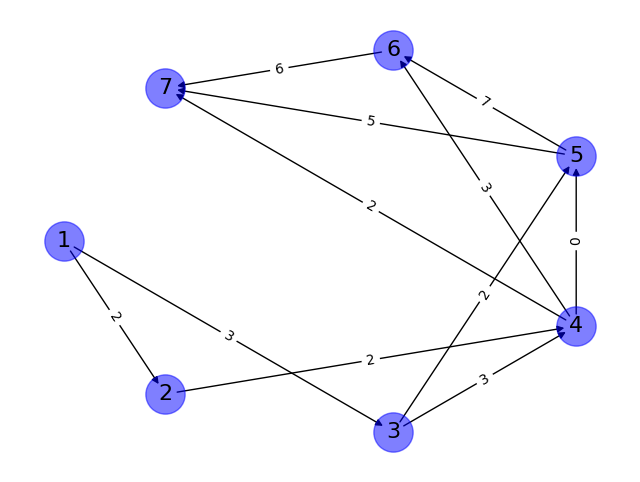

In [9]:
fig = plt.figure(figsize=(8,6))
posiciones = nx.shell_layout(G)
for vertice in G.nodes():
 nx.draw_networkx_nodes(G,posiciones,nodelist=[vertice],alpha=0.5,
 node_color='b',node_size=800)

nx.draw_networkx_edges(G,posiciones,nodelist=list(G.edges()))
etiquetas = {}
for vertice in G.nodes():
 etiquetas[vertice]=str(vertice)

nx.draw_networkx_labels(G,posiciones,etiquetas,font_size=16)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,posiciones,edge_labels)
plt.axis('off')
plt.show()

In [10]:
# creamos el proyecto
p = Node("Proyecto")

# creamos las tareas y sus dependencias

tareas = [("A", {"duracion": 2}),
 ("B", {"duracion": 3}),
 ("C", {"duracion": 2}),
 ("D", {"duracion": 3}),
 ("E", {"duracion": 2}),
 ("F", {"duracion": 0}),
 ("G", {"duracion": 3}),
 ("H", {"duracion": 2}),
 ("I", {"duracion": 7}),
 ("J", {"duracion": 5}),
 ("K", {"duracion": 6})]


dependencias = [("A", "C"),
                ("B", "D"),
                ("B", "E"),
                ("C", "F"),
                ("C", "G"),
                ("C", "H"),
                ("D", "F"),
                ("D", "G"),
                ("D", "H"),
                ("E", "J"),
                ("E", "I"),
                ("F", "J"),
                ("F", "I"),
                ("G", "K"),
                ("I", "K")]



In [11]:
# cargar tareas y duraciones
for i in tareas:
    p.add(Node(i[0],duration=i[1]["duracion"]))

# cargar al proyecto sus dependencias
for j in dependencias:
    p.link(j[0],j[1])

#actualizar el proyecto
p.update_all()

In [12]:
# obtennemos  la ruta critica

RC = p.get_critical_path()
D = p.duration
print("El ruta crítica entre el nodo 1 y 7 es:",RC)
print("La distancia de la ruta crítica del proyecto entre el nodo 1 y 7 es:",D)

El ruta crítica entre el nodo 1 y 7 es: [B, D, F, I, K]
La distancia de la ruta crítica del proyecto entre el nodo 1 y 7 es: 19
